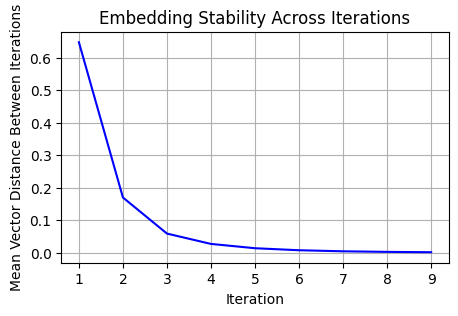

In [5]:
import json
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt

# Load all embedding files
embeddings = []
for i in range(10):
    with open(f'data/iterative_vectors/{i}.json', 'r') as f:
        embeddings.append(json.load(f))

# Calculate average deviation between consecutive iterations
deviations = []
for i in range(len(embeddings)-1):
    # Get all common words between consecutive iterations
    words = set(embeddings[i].keys()) & set(embeddings[i+1].keys())
    
    # Calculate euclidean distances for each word
    distances = []
    for word in words:
        vec1 = np.array(embeddings[i][word])
        vec2 = np.array(embeddings[i+1][word])
        distance = np.linalg.norm(vec1 - vec2)
        distances.append(distance)
    
    # Store average deviation for this iteration
    deviations.append(np.mean(distances))

# Plot the results
plt.figure(figsize=(5, 3))
plt.plot(range(1, 10), deviations, 'b-')
plt.xlabel('Iteration')
plt.ylabel('Mean Vector Distance Between Iterations')
plt.title('Embedding Stability Across Iterations')
plt.grid(True)
plt.show()